#Código Aula1 + Desafios


   filmeId  ...                                       genero
0        1  ...  Adventure|Animation|Children|Comedy|Fantasy
1        2  ...                   Adventure|Children|Fantasy
2        3  ...                               Comedy|Romance
3        4  ...                         Comedy|Drama|Romance
4        5  ...                                       Comedy

[5 rows x 3 columns]
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
(100836, 4)
As avaliações do filme um são
        usuarioID  filmeId        nota       momento
count  215.000000    215.0  215.000000  2.150000e+02
mean   306.530233      1.0    3.920930  1.129835e+09
std    180.419754      0.0    0.834859  2.393163e+08
min      1.000000      1.0    0.500000  8.293223e+08
25%    155.500000      1.0    3.500000  8.779224e+08
50%    290.000000      1

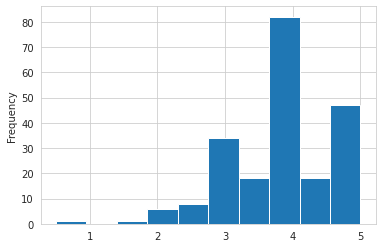

In [0]:
import pandas as pd
import matplotlib

filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
#filmes é um DataFrame
filmes.head()
filmes.columns = ["filmeId", "titulo", "genero"]
print(filmes.head())

avaliacoes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv")
avaliacoes.head()
print(avaliacoes.head())
print(avaliacoes.shape)

avaliacoes.columns = ["usuarioID", "filmeId", "nota", "momento"]
print("As avaliações do filme um são")
print(avaliacoes.query("filmeId==1").describe())
print("A média das notas é")
print(avaliacoes.query("filmeId==1")["nota"].mean())
print("Descrição das avaliações")
print(avaliacoes.describe())

notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean().round(2)

#não queremos correr o risco de amanhã os filmes não estarem em quantidade exata e ter que alterar o meu código
#filmes["nota_media"] = notas_medias_por_filme
#print(filmes.head())

filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
print(filmes_com_media.head())

avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist')

#Encontrar 18 filmes que não tiveram avaliação
print("Número total de filmes:", len(filmes))
print("Número total de filmes avaliados:", len(notas_medias_por_filme))
filmes_avaliados = filmes_com_media.query("nota in @notas_medias_por_filme")
filmes_nao_avaliados = filmes_com_media.query("nota not in @notas_medias_por_filme")
#Para determinar quantos filmes não foram avaliados basta verificar o tamanho desse DataFrame com os filmes não avaliados
print("Quantidade de filmes não avaliados:", len(filmes_nao_avaliados))
print(filmes_nao_avaliados.titulo)

#alterando o nome da coluna depois do join
filmes_com_media.columns = ["filmeId", "titulo", "genero", "nota_media"]
print(filmes_com_media.sort_values("nota_media", ascending=False))







In [0]:
#1) Arredondar as medias para duas casas decimais
filmes_com_media["nota_media"].values.round(2)
#para assumir no resto do código
#notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean().round(2)

array([3.92, 3.43, 3.26, ..., 3.5 , 3.5 , 4.  ])

In [0]:
#3)Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.
total_de_notas_por_filme = avaliacoes.groupby("filmeId").nota.count()
filmes_com_media_e_total = filmes_com_media.join(total_de_notas_por_filme, on="filmeId")
filmes_com_media_e_total.columns = ["filmeId", "titulo", "genero", "nota_media", "total_de_avaliacoes"]
filmes_com_media_e_total.sort_values("total_de_avaliacoes", ascending=False).head(15)



,filmeId,titulo,genero,nota_media,total_de_avaliacoes
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.16,329.0
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.43,317.0
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.20,307.0
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.16,279.0
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.19,278.0
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.23,251.0
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.75,238.0
97,110,Braveheart (1995),Action|Drama|War,4.03,237.0
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,3.97,224.0
461,527,Schindler's List (1993),Drama|War,4.22,220.0


In [0]:
#2) Descobrir os Gêneros e quais os valores únicos
filmes_por_genero = filmes_com_media_e_total.groupby("genero").filmeId.count()
filmes_por_genero

genero
(no genres listed)                     34
Action                                 60
Action|Adventure                       32
Action|Adventure|Animation             18
Action|Adventure|Animation|Children     6
                                       ..
Sci-Fi|Thriller                        23
Sci-Fi|Thriller|IMAX                    1
Thriller                               84
War                                     4
Western                                23
Name: filmeId, Length: 951, dtype: int64

In [0]:
#separando os generos em linhas
#4) Contar quantos filmes tem de cada Gênero
filmes_com_genero_separado = pd.DataFrame(filmes_com_media_e_total.genero.str.split("|").tolist(), index=filmes_com_media_e_total.filmeId).stack()
filmes_com_genero_separado = filmes_com_genero_separado.reset_index([0,"filmeId"])
filmes_com_genero_separado.columns = ["filmeId", "genero_unico"]
filmes_separados_por_genero = filmes_com_genero_separado.groupby("genero_unico").filmeId.count()
filmes_separados_por_genero






genero_unico
(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
Name: filmeId, dtype: int64

In [0]:
#separando os generos/copiando do coleguinha
filmes_com_genero_unico = filmes_com_media_e_total.genero.str.get_dummies(sep="|")
filmes_com_genero_unico.columns



Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')

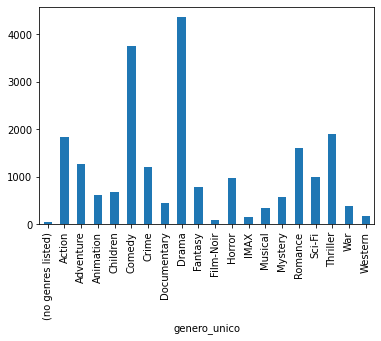

In [0]:
#plotando a partir do "filmes_com_genero_separado"
filmes_com_genero_separado.groupby("genero_unico").filmeId.count().plot(kind='bar')

In [0]:
#5) plotar o gráfico de tipo igual a barra apariçoes por gênero
#copiado do coleguinha
soma_por_genero = filmes_com_genero_unico.sum()
soma_por_genero

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

#QuarentenaDadosFilmes parte 2


In [0]:
filmes["genero"].str.get_dummies("|").sum(axis=1).value_counts()

2     3218
1     2851
3     2338
4      987
5      271
6       63
7       12
10       1
8        1
dtype: int64

In [0]:
serie_filmes_por_genero = filmes["genero"].str.get_dummies("|").sum().sort_values(ascending=False)
serie_filmes_por_genero

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

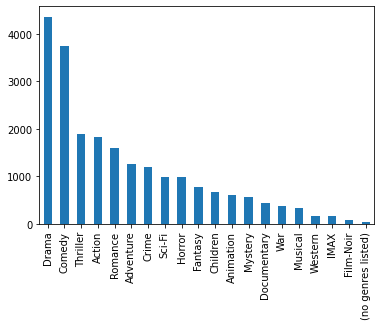

In [0]:
serie_filmes_por_genero.plot(kind = "bar")

In [0]:
filmes.index

RangeIndex(start=0, stop=9742, step=1)

In [0]:
filmes.values

array([[1, 'Toy Story (1995)',
        'Adventure|Animation|Children|Comedy|Fantasy'],
       [2, 'Jumanji (1995)', 'Adventure|Children|Fantasy'],
       [3, 'Grumpier Old Men (1995)', 'Comedy|Romance'],
       ...,
       [193585, 'Flint (2017)', 'Drama'],
       [193587, 'Bungo Stray Dogs: Dead Apple (2018)',
        'Action|Animation'],
       [193609, 'Andrew Dice Clay: Dice Rules (1991)', 'Comedy']],
      dtype=object)

In [0]:
serie_filmes_por_genero.head()

Drama       4361
Comedy      3756
Thriller    1894
Action      1828
Romance     1596
dtype: int64

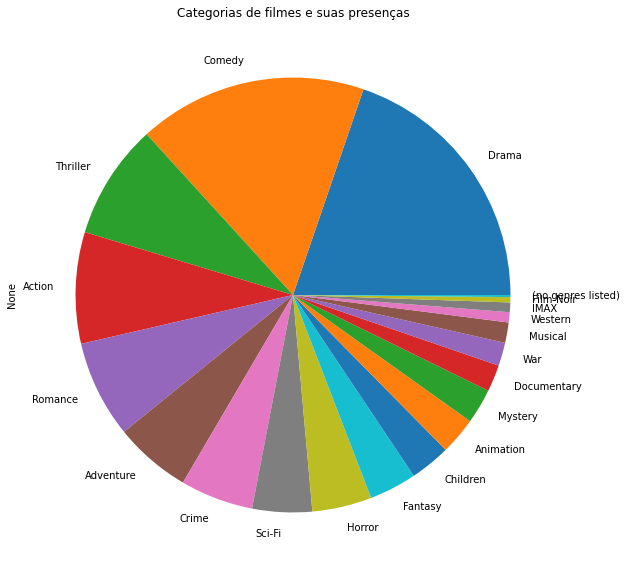

In [0]:
#complicado de avaliar, pois não somos lá muito bons para avaliar áreas nos gráficos - se o gráfico tem nome de comida, não use
import matplotlib.pyplot as plt
serie_filmes_por_genero.plot(kind="pie", title="Categorias de filmes e suas presenças", figsize = (10,10))
plt.show()


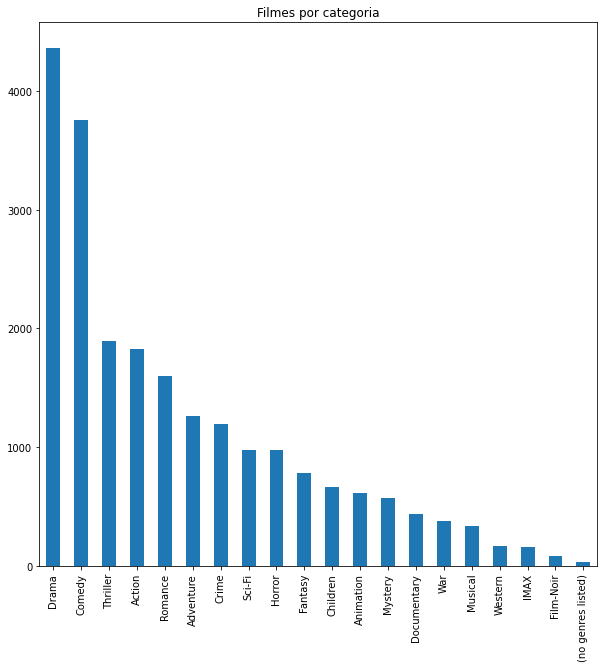

In [0]:
serie_filmes_por_genero.plot(kind="bar", title="Filmes por categoria", figsize=(10,10))
plt.show()


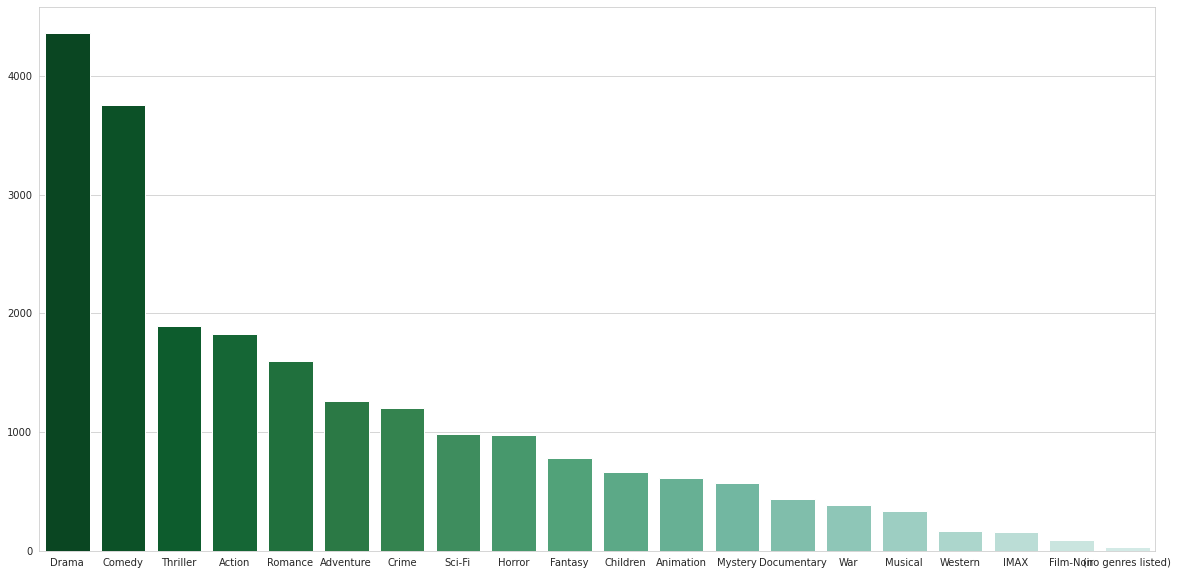

In [0]:
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
sns.barplot(x = serie_filmes_por_genero.index, 
            y=serie_filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(serie_filmes_por_genero)+5))
plt.show()


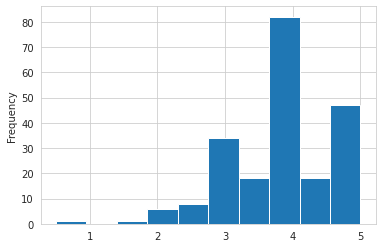

In [0]:
notas_filme_1 =avaliacoes.query("filmeId == 1")["nota"]
notas_filme_1.describe()
notas_filme_1.plot(kind="hist")

In [0]:
filmes_com_media.sort_values("nota_media", ascending=False)[2450:2500]

,filmeId,titulo,genero,nota_media
8765,128620,Victoria (2015),Crime|Drama|Romance,3.90
599,745,Wallace & Gromit: A Close Shave (1995),Animation|Children|Comedy,3.90
5480,26258,"Topo, El (1970)",Fantasy|Western,3.90
4795,7143,"Last Samurai, The (2003)",Action|Adventure|Drama|War,3.90
5451,26084,"Music Man, The (1962)",Children|Comedy|Musical|Romance,3.90
3016,4034,Traffic (2000),Crime|Drama|Thriller,3.90
4100,5876,"Quiet American, The (2002)",Drama|Thriller|War,3.90
2894,3871,Shane (1953),Drama|Western,3.90
6580,55247,Into the Wild (2007),Action|Adventure|Drama,3.90
2156,2871,Deliverance (1972),Adventure|Drama|Thriller,3.90


In [0]:
def plot_filme(n):
  notas_do_filme =avaliacoes.query(f"filmeId == {n}")["nota"]
  print(notas_do_filme.mean())
  notas_do_filme.plot(kind="hist")
  return notas_do_filme.describe()

3.883116883116883


count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

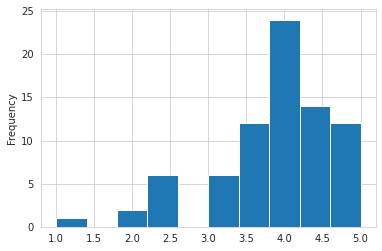

In [0]:
plot_filme(46578)

3.880434782608696


count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

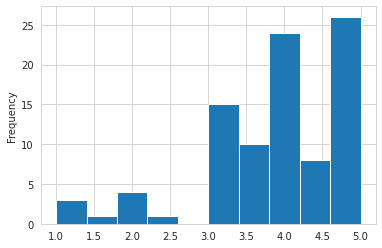

In [0]:
plot_filme(919)

In [0]:
def plot_filme(n):
  notas_do_filme =avaliacoes.query(f"filmeId == {n}")["nota"]
  print(notas_do_filme.mean())
  notas_do_filme.plot(kind="hist")
  plt.show()
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()

#Desafios Aula 2

##Desafio 1

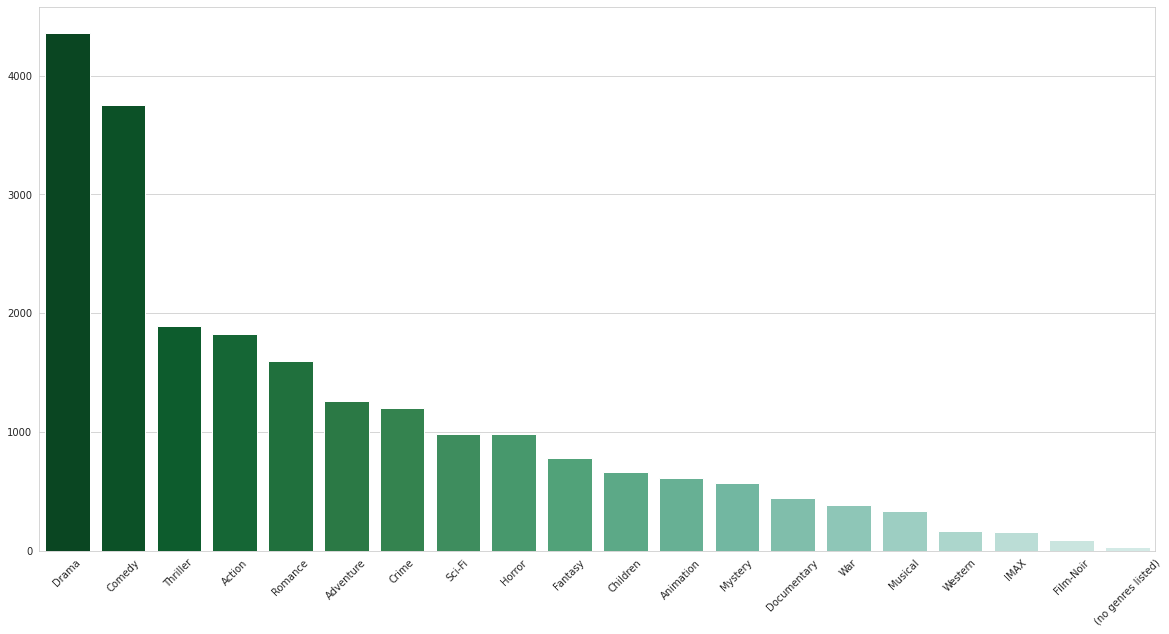

In [0]:
#Desafio1 = Rotacionar os (ticks) nomes dos gêneros via seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.tick_params("x", labelrotation = 45)
sns.barplot(x = serie_filmes_por_genero.index, 
            y=serie_filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(serie_filmes_por_genero)+5))
plt.show()

##Desafio 2

3.9


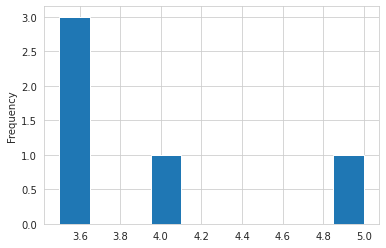

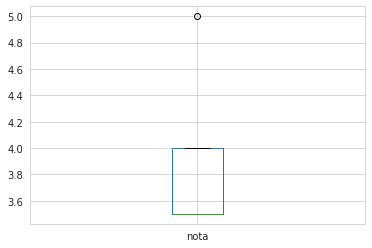

count    5.00000
mean     3.90000
std      0.65192
min      3.50000
25%      3.50000
50%      3.50000
75%      4.00000
max      5.00000
Name: nota, dtype: float64

In [0]:
#Desafio2 = Comparar outros filmes com notas próximas e distribuições bem diferentes
plot_filme(128620)

3.8958333333333335


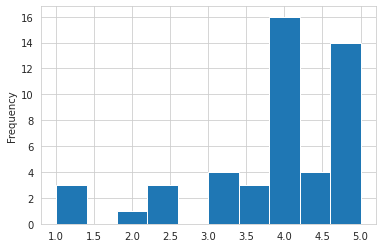

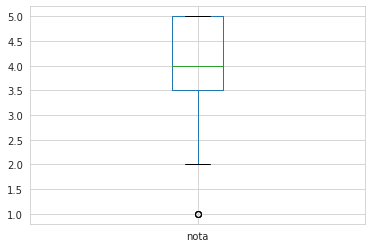

count    48.000000
mean      3.895833
std       1.101055
min       1.000000
25%       3.500000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

In [0]:
plot_filme(745)

##Desafio 3

In [0]:
#Desafio3 - 10 filmes com mais votos (quantidades) e postar boxplot dos 10 filmes
#controle
print(filmes_com_media_e_total.sort_values("total_de_avaliacoes", ascending=False).head(10))
#criando data-set com o controle
lista_dos_10_filmes_com_mais_avaliacoes = filmes_com_media_e_total.sort_values("total_de_avaliacoes", ascending=False).head(10)
print(lista_dos_10_filmes_com_mais_avaliacoes.titulo)


      filmeId  ... total_de_avaliacoes
314       356  ...               329.0
277       318  ...               317.0
257       296  ...               307.0
510       593  ...               279.0
1939     2571  ...               278.0
224       260  ...               251.0
418       480  ...               238.0
97        110  ...               237.0
507       589  ...               224.0
461       527  ...               220.0

[10 rows x 5 columns]
314                           Forrest Gump (1994)
277              Shawshank Redemption, The (1994)
257                           Pulp Fiction (1994)
510              Silence of the Lambs, The (1991)
1939                           Matrix, The (1999)
224     Star Wars: Episode IV - A New Hope (1977)
418                          Jurassic Park (1993)
97                              Braveheart (1995)
507             Terminator 2: Judgment Day (1991)
461                       Schindler's List (1993)
Name: titulo, dtype: object


In [0]:
#juntando BD filmes com avaliacoes
filmes_com_avaliacoes = avaliacoes.merge(filmes, on="filmeId", how="outer")
filmes_com_avaliacoes.head(15)



,usuarioID,filmeId,nota,momento,titulo,genero
0,1.0,1,4.0,9.649827e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5.0,1,4.0,8.474350e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7.0,1,4.5,1.106636e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15.0,1,2.5,1.510578e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17.0,1,4.5,1.305696e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
5,18.0,1,3.5,1.455210e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
6,19.0,1,4.0,9.657056e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
7,21.0,1,3.5,1.407619e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
8,27.0,1,3.0,9.626853e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
9,31.0,1,5.0,8.504666e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [0]:
#checar consulta na base de dados filmes
Os_10_filmes_mais_avaliados_sem_nota = filmes.query("titulo in @lista_dos_10_filmes_com_mais_avaliacoes.titulo")
print(Os_10_filmes_mais_avaliados_sem_nota.sort_values("titulo").titulo)

In [0]:
Os_10_filmes_mais_avaliados_notas = avaliacoes.query("filmeId in @lista_dos_10_filmes_com_mais_avaliacoes.filmeId")
print(Os_10_filmes_mais_avaliados_notas.filmeId.sort_values())

In [0]:
db_para_grafico = filmes_com_avaliacoes.query("filmeId in @lista_dos_10_filmes_com_mais_avaliacoes.filmeId")
print(db_para_grafico.filmeId.sort_values())

In [0]:
avaliacoes.head(10)

,usuarioID,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [0]:
filmes.query("filmeId == 593")

,filmeId,titulo,genero
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller


4.161290322580645


count    279.000000
mean       4.161290
std        0.853983
min        0.500000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: nota, dtype: float64

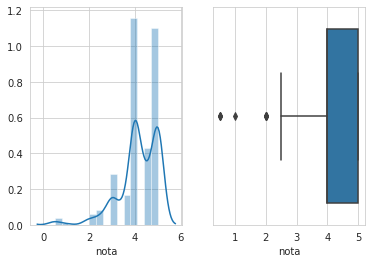

In [0]:
plot_filme(593)


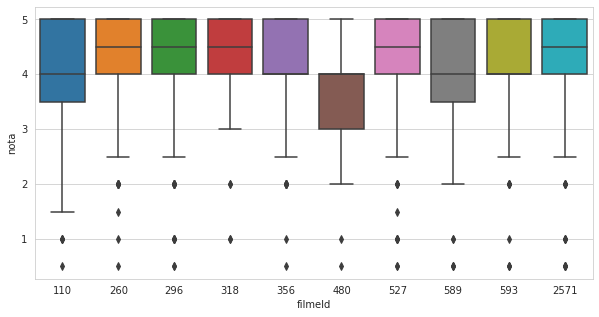

In [0]:
#exemplo de plotagem de boxplot para vários valores - usando só o bd avaliações
plt.figure(figsize=(10,5))
sns.boxplot(data= Os_10_filmes_mais_avaliados_notas, 
            x="filmeId", 
            y="nota")


##Desafio 4

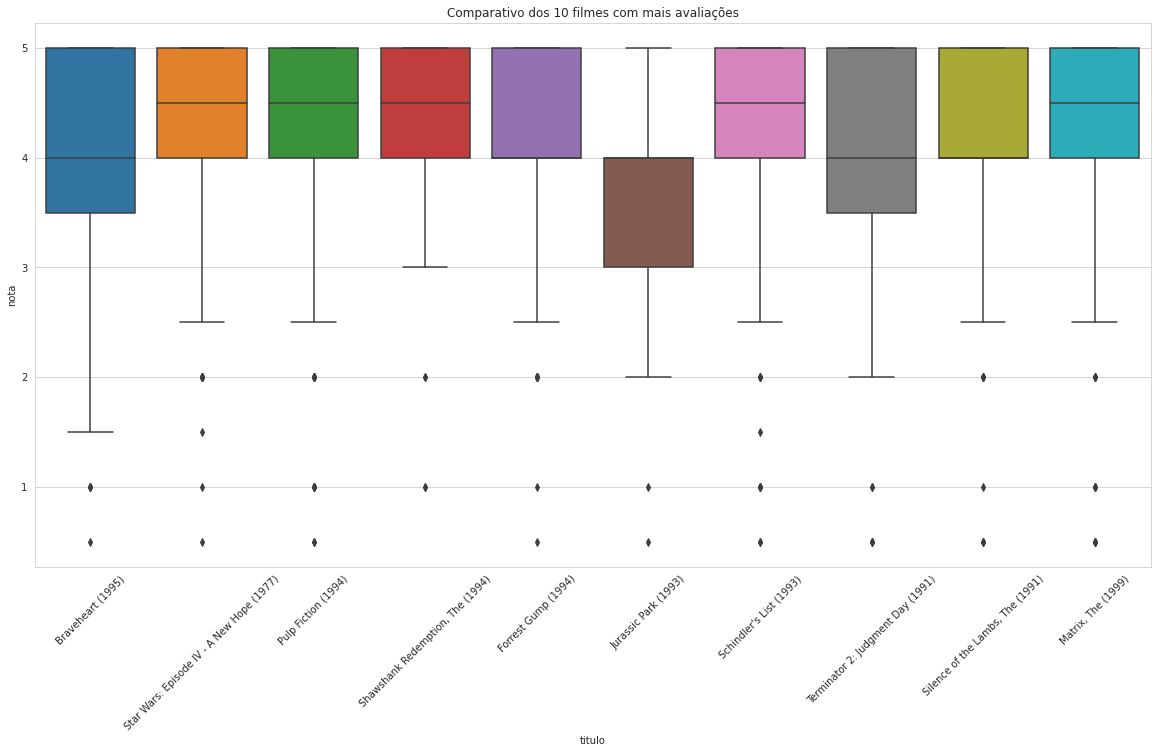

In [0]:
#Desafio4: O boxplot deve estar num tamanho adequado e com os Nomes dos filmes nos Ticks - usando o BD de filmes mergeado com o BD avaliações
plt.figure(figsize=(20,10))
sns.boxplot(data= db_para_grafico.sort_values("filmeId"), 
            x="titulo", 
            y="nota")

plt.tick_params("x", zorder=1, labelrotation=45)
plt.title("Comparativo dos 10 filmes com mais avaliações")
plt.show()

##Desafio 5


In [0]:
#Desafio5: Calcular a moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5

notas_medianas_por_filme = avaliacoes.groupby("filmeId")["nota"].median().round(2)
print(notas_medianas_por_filme.head(10))

#join bd com medias e totais de avaliação
filmes_com_media_e_mediana = filmes_com_media.join(notas_medianas_por_filme, on="filmeId")
filmes_com_media_e_mediana.columns = ["filmeId","titulo", "genero", "nota_media", "mediana_nota"]





filmeId
1     4.0
2     3.5
3     3.0
4     3.0
5     3.0
6     4.0
7     3.0
8     3.0
9     3.0
10    3.5
Name: nota, dtype: float64


###Busca filmes por mediana

In [0]:
def filmes_por_mediana(n):
     return filmes_com_media_e_mediana.query(f"mediana_nota == {n}")
    

filmes_por_mediana(5)


,filmeId,titulo,genero,nota_media,mediana_nota
48,53,Lamerica (1994),Adventure|Drama,5.00,5.0
76,85,Angels and Insects (1995),Drama|Romance,3.86,5.0
87,99,Heidi Fleiss: Hollywood Madam (1995),Documentary,5.00,5.0
121,148,"Awfully Big Adventure, An (1995)",Drama,5.00,5.0
405,467,Live Nude Girls (1995),Comedy,5.00,5.0
...,...,...,...,...,...
9611,176601,Black Mirror,(no genres listed),5.00,5.0
9633,179133,Loving Vincent (2017),Animation|Crime|Drama,5.00,5.0
9634,179135,Blue Planet II (2017),Documentary,5.00,5.0
9688,184245,De platte jungle (1978),Documentary,5.00,5.0


In [0]:
filmes_por_mediana(3)

,filmeId,titulo,genero,nota_media,mediana_nota
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,3.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,3.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,3.0
6,7,Sabrina (1995),Comedy|Romance,3.19,3.0
7,8,Tom and Huck (1995),Adventure|Children,2.88,3.0
...,...,...,...,...,...
9703,185435,"Game Over, Man! (2018)",Action|Comedy,3.00,3.0
9704,185473,Blockers (2018),Comedy,3.00,3.0
9706,186587,Rampage (2018),Action|Adventure|Sci-Fi,3.00,3.0
9719,189111,Spiral (2018),Documentary,3.00,3.0


In [0]:
filmes_por_mediana(0.5)

,filmeId,titulo,genero,nota_media,mediana_nota
1157,1526,Fathers' Day (1997),Comedy,1.0,0.5
2689,3604,Gypsy (1962),Musical,0.5,0.5
2933,3933,"Killer Shrews, The (1959)",Horror|Sci-Fi,0.5,0.5
3027,4051,Horrors of Spider Island (Ein Toter Hing im Ne...,Horror|Sci-Fi,0.5,0.5
3235,4371,Baby Boy (2001),Crime|Drama,0.5,0.5
...,...,...,...,...,...
9419,165645,Bad Santa 2 (2016),Comedy,0.5,0.5
9444,167296,Iron Man (1931),Drama,0.5,0.5
9558,173307,The Gracefield Incident (2015),Action|Horror|Sci-Fi,0.5,0.5
9590,175475,The Emoji Movie (2017),Animation|Children|Comedy,0.5,0.5


###Buscando as Modas

In [0]:
#usando o operador aggregate do Pandas
moda_por_filme = avaliacoes.groupby("filmeId")["nota"].agg(lambda x:x.value_counts().index[0])
moda_por_filme

filmeId
1         4.0
2         4.0
3         3.0
4         3.0
5         3.0
         ... 
193581    4.0
193583    3.5
193585    3.5
193587    3.5
193609    4.0
Name: nota, Length: 9724, dtype: float64

In [0]:
#tentando fazer o join com o planilhão

filmes_com_tudo = filmes_com_media_e_mediana.join(moda_por_filme, on="filmeId")
filmes_com_tudo.columns=["filmeId","titulo","genero", "nota_media", "mediana_nota", "moda_nota"]
filmes_com_tudo.sort_values("moda_nota", ascending=False)
filmes_com_tudo.head(10)


,filmeId,titulo,genero,nota_media,mediana_nota,moda_nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,4.0,4.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,3.5,4.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,3.0,3.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,3.0,3.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,3.0,3.0
5,6,Heat (1995),Action|Crime|Thriller,3.95,4.0,4.0
6,7,Sabrina (1995),Comedy|Romance,3.19,3.0,3.0
7,8,Tom and Huck (1995),Adventure|Children,2.88,3.0,3.0
8,9,Sudden Death (1995),Action,3.12,3.0,3.0
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.50,3.5,3.0


###Busca filmes por mediana,média e moda


In [0]:
def filmes_por_media(n):
     return filmes_com_tudo.query(f"nota_media == {n}")

def filmes_por_moda(n):
    return filmes_com_tudo.query(f"moda_nota =={n}")

####Comparando um filme com média 0,5, com um filme com mediana 0,5 com um filme com moda 0,5

In [0]:
filmes_por_mediana(0.5)


,filmeId,titulo,genero,nota_media,mediana_nota
1157,1526,Fathers' Day (1997),Comedy,1.0,0.5
2689,3604,Gypsy (1962),Musical,0.5,0.5
2933,3933,"Killer Shrews, The (1959)",Horror|Sci-Fi,0.5,0.5
3027,4051,Horrors of Spider Island (Ein Toter Hing im Ne...,Horror|Sci-Fi,0.5,0.5
3235,4371,Baby Boy (2001),Crime|Drama,0.5,0.5
...,...,...,...,...,...
9419,165645,Bad Santa 2 (2016),Comedy,0.5,0.5
9444,167296,Iron Man (1931),Drama,0.5,0.5
9558,173307,The Gracefield Incident (2015),Action|Horror|Sci-Fi,0.5,0.5
9590,175475,The Emoji Movie (2017),Animation|Children|Comedy,0.5,0.5


In [0]:
filmes_por_media(0.5)


,filmeId,titulo,genero,nota_media,mediana_nota,moda_nota
2689,3604,Gypsy (1962),Musical,0.5,0.5,0.5
2933,3933,"Killer Shrews, The (1959)",Horror|Sci-Fi,0.5,0.5,0.5
3027,4051,Horrors of Spider Island (Ein Toter Hing im Ne...,Horror|Sci-Fi,0.5,0.5,0.5
3235,4371,Baby Boy (2001),Crime|Drama,0.5,0.5,0.5
3369,4580,Cyborg (1989),Action|Sci-Fi,0.5,0.5,0.5
...,...,...,...,...,...,...
9419,165645,Bad Santa 2 (2016),Comedy,0.5,0.5,0.5
9444,167296,Iron Man (1931),Drama,0.5,0.5,0.5
9558,173307,The Gracefield Incident (2015),Action|Horror|Sci-Fi,0.5,0.5,0.5
9590,175475,The Emoji Movie (2017),Animation|Children|Comedy,0.5,0.5,0.5


In [0]:
filmes_por_moda(0.5)

,filmeId,titulo,genero,nota_media,mediana_nota,moda_nota
530,619,Ed (1996),Comedy,2.60,3.00,0.5
662,867,Carpool (1996),Comedy|Crime,1.75,1.75,0.5
843,1107,Loser (1991),Comedy,2.00,2.00,0.5
1015,1326,Amityville II: The Possession (1982),Horror,1.12,1.00,0.5
1114,1453,"Beautician and the Beast, The (1997)",Comedy|Romance,1.83,2.00,0.5
...,...,...,...,...,...,...
9535,172547,Despicable Me 3 (2017),Adventure|Animation|Children|Comedy,2.25,2.25,0.5
9558,173307,The Gracefield Incident (2015),Action|Horror|Sci-Fi,0.50,0.50,0.5
9590,175475,The Emoji Movie (2017),Animation|Children|Comedy,0.50,0.50,0.5
9689,184253,The Cloverfield Paradox (2018),Horror|Mystery|Sci-Fi|Thriller,2.25,2.25,0.5


1.0


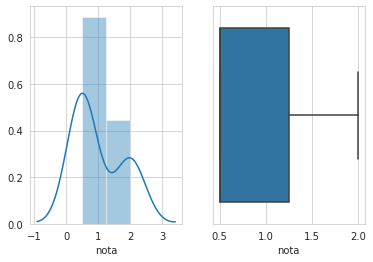

0.5


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


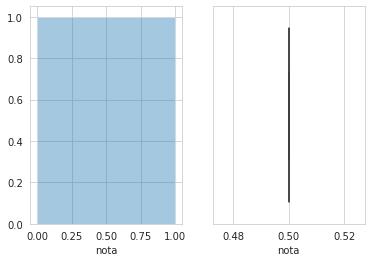

2.6


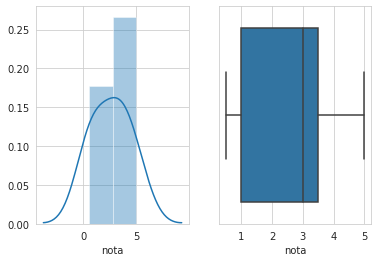

In [0]:
plot_filme(1526)
plt.show()
plot_filme(3604)
plt.show()
plot_filme(619)
plt.show()

###Comparando filmes com média, mediana e moda = 3

In [0]:
#método será buscar o primeiro filme de cada resultado e comparar os 3

In [0]:
filmes_por_media(3)

,filmeId,titulo,genero,nota_media,mediana_nota,moda_nota
14,15,Cutthroat Island (1995),Action|Adventure|Romance,3.0,3.0,4.0
29,30,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,Crime|Drama,3.0,4.0,4.0
38,42,Dead Presidents (1995),Action|Crime|Drama,3.0,3.0,3.0
45,49,When Night Is Falling (1995),Drama|Romance,3.0,3.0,3.0
75,83,Once Upon a Time... When We Were Colored (1995),Drama|Romance,3.0,3.0,3.0
...,...,...,...,...,...,...
9704,185473,Blockers (2018),Comedy,3.0,3.0,3.0
9706,186587,Rampage (2018),Action|Adventure|Sci-Fi,3.0,3.0,3.0
9708,187541,Incredibles 2 (2018),Action|Adventure|Animation|Children,3.0,3.5,4.0
9719,189111,Spiral (2018),Documentary,3.0,3.0,3.0


In [0]:
filmes_por_mediana(3)

,filmeId,titulo,genero,nota_media,mediana_nota
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,3.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,3.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,3.0
6,7,Sabrina (1995),Comedy|Romance,3.19,3.0
7,8,Tom and Huck (1995),Adventure|Children,2.88,3.0
...,...,...,...,...,...
9703,185435,"Game Over, Man! (2018)",Action|Comedy,3.00,3.0
9704,185473,Blockers (2018),Comedy,3.00,3.0
9706,186587,Rampage (2018),Action|Adventure|Sci-Fi,3.00,3.0
9719,189111,Spiral (2018),Documentary,3.00,3.0


In [0]:
filmes_por_moda(3)

,filmeId,titulo,genero,nota_media,mediana_nota,moda_nota
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,3.00,3.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,3.00,3.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,3.00,3.0
6,7,Sabrina (1995),Comedy|Romance,3.19,3.00,3.0
7,8,Tom and Huck (1995),Adventure|Children,2.88,3.00,3.0
...,...,...,...,...,...,...
9704,185473,Blockers (2018),Comedy,3.00,3.00,3.0
9705,185585,Pacific Rim: Uprising (2018),Action|Fantasy|Sci-Fi,2.75,2.75,3.0
9706,186587,Rampage (2018),Action|Adventure|Sci-Fi,3.00,3.00,3.0
9719,189111,Spiral (2018),Documentary,3.00,3.00,3.0


3.2596153846153846


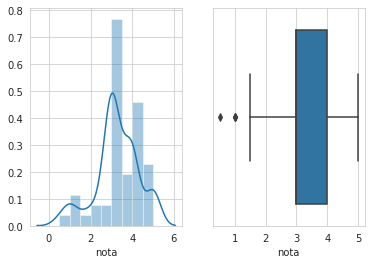

2.357142857142857


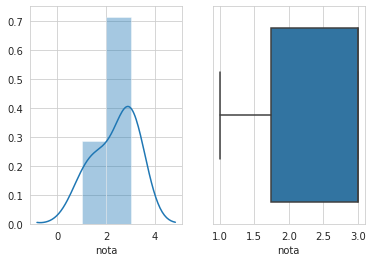

3.0


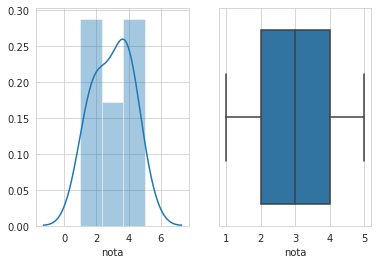

In [0]:
plot_filme(3)
plt.show()
plot_filme(4)
plt.show()
plot_filme(15)
plt.show()


####Comparando filmes com média, mediana e moda == 5


In [0]:
filmes_por_media(5)

,filmeId,titulo,genero,nota_media,mediana_nota,moda_nota
48,53,Lamerica (1994),Adventure|Drama,5.0,5.0,5.0
87,99,Heidi Fleiss: Hollywood Madam (1995),Documentary,5.0,5.0,5.0
121,148,"Awfully Big Adventure, An (1995)",Drama,5.0,5.0,5.0
405,467,Live Nude Girls (1995),Comedy,5.0,5.0,5.0
432,495,In the Realm of the Senses (Ai no corrida) (1976),Drama,5.0,5.0,5.0
...,...,...,...,...,...,...
9611,176601,Black Mirror,(no genres listed),5.0,5.0,5.0
9633,179133,Loving Vincent (2017),Animation|Crime|Drama,5.0,5.0,5.0
9634,179135,Blue Planet II (2017),Documentary,5.0,5.0,5.0
9688,184245,De platte jungle (1978),Documentary,5.0,5.0,5.0


In [0]:
filmes_por_mediana(5)

,filmeId,titulo,genero,nota_media,mediana_nota
48,53,Lamerica (1994),Adventure|Drama,5.00,5.0
76,85,Angels and Insects (1995),Drama|Romance,3.86,5.0
87,99,Heidi Fleiss: Hollywood Madam (1995),Documentary,5.00,5.0
121,148,"Awfully Big Adventure, An (1995)",Drama,5.00,5.0
405,467,Live Nude Girls (1995),Comedy,5.00,5.0
...,...,...,...,...,...
9611,176601,Black Mirror,(no genres listed),5.00,5.0
9633,179133,Loving Vincent (2017),Animation|Crime|Drama,5.00,5.0
9634,179135,Blue Planet II (2017),Documentary,5.00,5.0
9688,184245,De platte jungle (1978),Documentary,5.00,5.0


In [0]:
filmes_por_moda(5)

,filmeId,titulo,genero,nota_media,mediana_nota,moda_nota
16,17,Sense and Sensibility (1995),Drama|Romance,3.78,4.00,5.0
36,40,"Cry, the Beloved Country (1995)",Drama,4.25,4.25,5.0
46,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,4.24,4.50,5.0
48,53,Lamerica (1994),Adventure|Drama,5.00,5.00,5.0
52,58,"Postman, The (Postino, Il) (1994)",Comedy|Drama|Romance,4.03,4.00,5.0
...,...,...,...,...,...,...
9634,179135,Blue Planet II (2017),Documentary,5.00,5.00,5.0
9688,184245,De platte jungle (1978),Documentary,5.00,5.00,5.0
9702,185135,Sherlock - A Study in Pink (2010),Crime,4.75,4.75,5.0
9709,187593,Deadpool 2 (2018),Action|Comedy|Sci-Fi,3.88,4.00,5.0


5.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


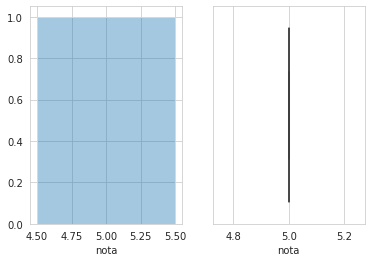

3.857142857142857


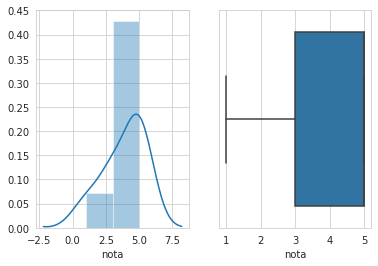

3.7761194029850746


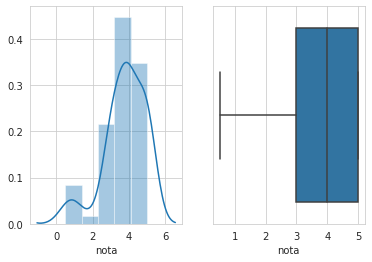

In [0]:
plot_filme(53)
plt.show()
plot_filme(85)
plt.show()
plot_filme(17)
plt.show()

##Desafio 6

In [0]:
#Desafio6: plotar o boxplot e o histograma de um filme um do lado do outro
def plot_filme(n):
  notas_do_filme =avaliacoes.query(f"filmeId == {n}")["nota"]
  print(notas_do_filme.mean())
  fig, axs = plt.subplots(ncols=2)
  sns.distplot(notas_do_filme, ax=axs[0])
  sns.boxplot(notas_do_filme, ax=axs[1])
  return notas_do_filme.describe()

4.161290322580645


count    279.000000
mean       4.161290
std        0.853983
min        0.500000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: nota, dtype: float64

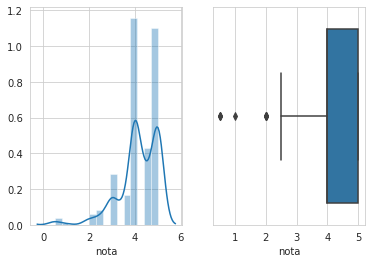

In [0]:
plot_filme(593)

##Desafio 7

In [0]:
#Desafio7:Gráfico de notas médias por ano



In [0]:
#primeiro_passo separar o titulo do ano
filmes_com_avaliacoes['ano'] = filmes_com_avaliacoes['titulo'].str.extract('(\(\d{4}\))', expand=True)
filmes_com_avaliacoes.head()

,usuarioID,filmeId,nota,momento,titulo,genero,ano
0,1.0,1,4.0,9.649827e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,(1995)
1,5.0,1,4.0,8.474350e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,(1995)
2,7.0,1,4.5,1.106636e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,(1995)
3,15.0,1,2.5,1.510578e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,(1995)
4,17.0,1,4.5,1.305696e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,(1995)


In [0]:
#segundo_passo organizar e agrupar o DataFrame por ano
medias_por_ano = filmes_com_avaliacoes.groupby("ano")["nota"].mean()
medias_por_ano.head(10)

ano
(1902)    3.50000
(1903)    2.50000
(1908)    4.00000
(1915)    2.00000
(1916)    3.60000
(1917)    4.50000
(1919)    2.00000
(1920)    3.81250
(1921)    4.10000
(1922)    3.53125
Name: nota, dtype: float64

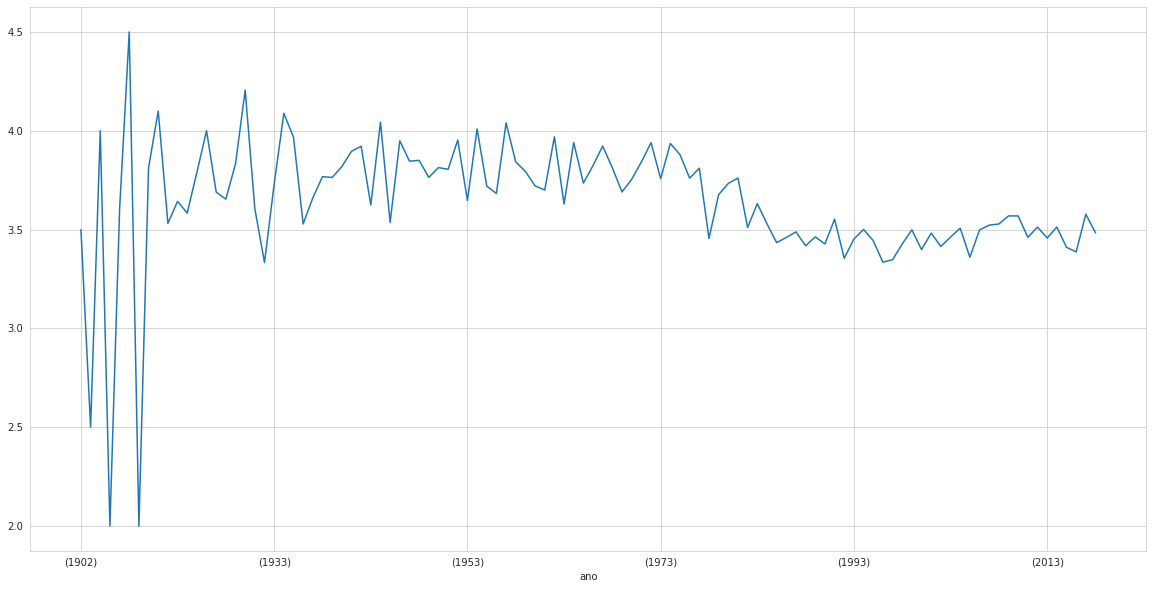

In [0]:
#terceiro_passo plotar o grafico (linha)
plt.figure(figsize=(20,10))
medias_por_ano.plot()
plt.show()

In [0]:
filmes_com_avaliacoes.head(10)

,filmeId_coluna1,titulo,genero,usuarioID,filmeId,nota,momento
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,3.0,4.0,964981247.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1.0,6.0,4.0,964982224.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1.0,47.0,5.0,964983815.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1.0,50.0,5.0,964982931.0
4,5,Father of the Bride Part II (1995),Comedy,1.0,70.0,3.0,964982400.0
5,6,Heat (1995),Action|Crime|Thriller,1.0,101.0,5.0,964980868.0
6,7,Sabrina (1995),Comedy|Romance,1.0,110.0,4.0,964982176.0
7,8,Tom and Huck (1995),Adventure|Children,1.0,151.0,5.0,964984041.0
8,9,Sudden Death (1995),Action,1.0,157.0,5.0,964984100.0
9,10,GoldenEye (1995),Action|Adventure|Thriller,1.0,163.0,5.0,964983650.0
